# FloPy3
## Plotting SWR Process Results
This notebook demonstrates the simple array and results plotting capabilities of flopy.  It demonstrates these capabilities by loading and running an existing model, and then showing how the `.plot()` method can be used to make simple plots of the model data and model results.

In [1]:
%matplotlib inline
from IPython.display import Image
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy


#Set the paths
datapth = os.path.join('..', 'data', 'swr_test')
    
files = ('SWR004.obs', 'SWR004.vel', 'SWR004.str', 'SWR004.stg', 'SWR004.flow')

### Load SWR Process observations

In [2]:
sobj = flopy.utils.SwrObs(os.path.join(datapth, files[0]))

nobs = sobj.get_nobs()
obsnames = sobj.get_obsnames()
print('nobs: ', nobs)
print(obsnames)

ts = sobj.get_data()

nobs:  9
('OBS1', 'OBS2', 'OBS3', 'OBS4', 'OBS5', 'OBS6', 'OBS7', 'OBS8', 'OBS9')


#### Plot the data from the binary SWR Process observation file

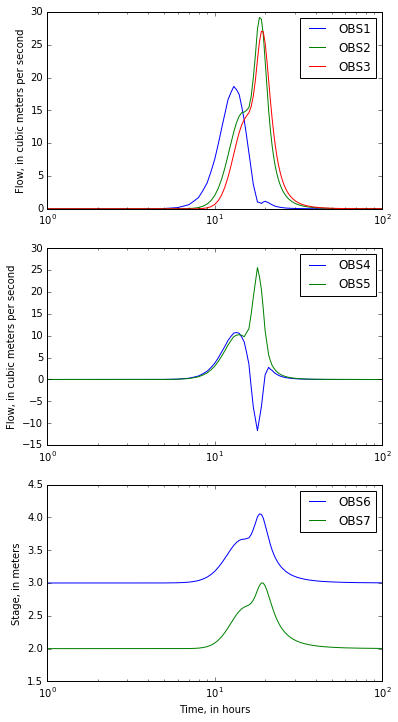

In [3]:
fig = plt.figure(figsize=(6, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax1.semilogx(ts['totim']/3600., -ts['OBS1'], label='OBS1')
ax1.semilogx(ts['totim']/3600., -ts['OBS2'], label='OBS2')
ax1.semilogx(ts['totim']/3600., -ts['OBS9'], label='OBS3')
ax1.set_ylabel('Flow, in cubic meters per second')
ax1.legend()

ax = fig.add_subplot(3, 1, 2, sharex=ax1)
ax.semilogx(ts['totim']/3600., -ts['OBS4'], label='OBS4')
ax.semilogx(ts['totim']/3600., -ts['OBS5'], label='OBS5')
ax.set_ylabel('Flow, in cubic meters per second')
ax.legend()

ax = fig.add_subplot(3, 1, 3, sharex=ax1)
ax.semilogx(ts['totim']/3600., ts['OBS6'], label='OBS6')
ax.semilogx(ts['totim']/3600., ts['OBS7'], label='OBS7')
ax.set_xlim(1, 100)
ax.set_ylabel('Stage, in meters')
ax.set_xlabel('Time, in hours')
ax.legend()

### Load the same data from the individual binary SWR Process files

Load discharge data from the flow file. The flow file contains the simulated flow between connected reaches for each connection in the model.

In [4]:
sobj = flopy.utils.SwrFile(os.path.join(datapth, files[1]), swrtype='flow')
times = sobj.get_times()/3600.
obs1 = sobj.get_ts(irec=1, iconn=0)
obs2 = sobj.get_ts(irec=14, iconn=13)
obs4 = sobj.get_ts(irec=4, iconn=3)
obs5 = sobj.get_ts(irec=5, iconn=4)

Load discharge data from the structure file. The structure file contains the simulated structure flow for each reach with a structure.

In [5]:
sobj = flopy.utils.SwrFile(os.path.join(datapth, files[2]), swrtype='structure')
obs3 = sobj.get_ts(irec=17, istr=0)

Load stage data from the stage file. The flow file contains the simulated stage for each reach in the model.

In [6]:
sobj = flopy.utils.SwrFile(os.path.join(datapth, files[3]), swrtype='stage')
obs6 = sobj.get_ts(irec=13)

Load budget data from the budget file. The budget file contains the simulated budget for each reach group in the model. The budget file also contains the stage data for each reach group. In this case the number of reach groups equals the number of reaches in the model.

In [7]:
sobj = flopy.utils.SwrFile(os.path.join(datapth, files[4]), swrtype='budget')
obs7 = sobj.get_ts(irec=17)

#### Plot the data loaded from the individual binary SWR Process files.

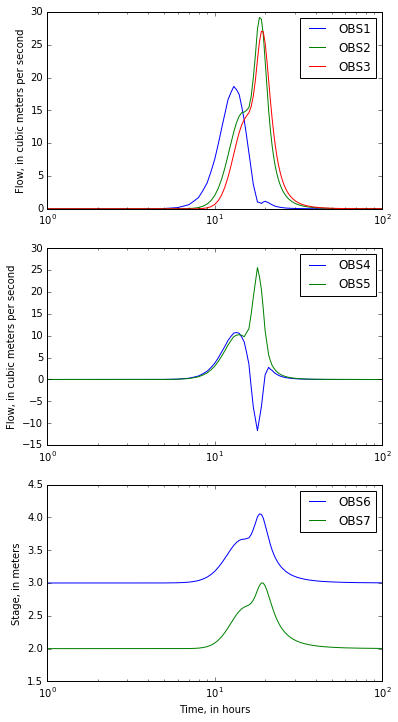

In [8]:
fig = plt.figure(figsize=(6, 12))
ax1 = fig.add_subplot(3, 1, 1)
ax1.semilogx(times, obs1['flow'], label='OBS1')
ax1.semilogx(times, obs2['flow'], label='OBS2')
ax1.semilogx(times, -obs3['strflow'], label='OBS3')
ax1.set_ylabel('Flow, in cubic meters per second')
ax1.legend()

ax = fig.add_subplot(3, 1, 2, sharex=ax1)
ax.semilogx(times, obs4['flow'], label='OBS4')
ax.semilogx(times, obs5['flow'], label='OBS5')
ax.set_ylabel('Flow, in cubic meters per second')
ax.legend()

ax = fig.add_subplot(3, 1, 3, sharex=ax1)
ax.semilogx(times, obs6['stage'], label='OBS6')
ax.semilogx(times, obs7['stage'], label='OBS7')
ax.set_xlim(1, 100)
ax.set_ylabel('Stage, in meters')
ax.set_xlabel('Time, in hours')
ax.legend()

In [9]:
sobj = flopy.utils.SwrFile(os.path.join(datapth, files[3]), swrtype='stage')
print(times)

[   0.5    1.     1.5    2.     2.5    3.     3.5    4.     4.5    5.
    5.5    6.     6.5    7.     7.5    8.     8.5    9.     9.5   10.
   10.5   11.    11.5   12.    12.5   13.    13.5   14.    14.5   15.
   15.5   16.    16.5   17.    17.5   18.    18.5   19.    19.5   20.
   20.5   21.    21.5   22.    22.5   23.    23.5   24.    24.5   25.
   25.5   26.    26.5   27.    27.5   28.    28.5   29.    29.5   30.
   30.5   31.    31.5   32.    32.5   33.    33.5   34.    34.5   35.
   35.5   36.    36.5   37.    37.5   38.    38.5   39.    39.5   40.
   40.5   41.    41.5   42.    42.5   43.    43.5   44.    44.5   45.
   45.5   46.    46.5   47.    47.5   48.    48.5   49.    49.5   50.
   50.5   51.    51.5   52.    52.5   53.    53.5   54.    54.5   55.
   55.5   56.    56.5   57.    57.5   58.    58.5   59.    59.5   60.
   60.5   61.    61.5   62.    62.5   63.    63.5   64.    64.5   65.
   65.5   66.    66.5   67.    67.5   68.    68.5   69.    69.5   70.
   70.5   71.    71.